# Visualise DenseNet-40-12 with CIFAR-10

In [1]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Set Caffe to use your GPU as DenseNet can take some time to complete a forward pass using the CPU.
caffe.set_mode_gpu()

model_def = 'densenet40_12.prototxt'
model_weights = 'densenet40_12.caffemodel' 
net = caffe.Net(model_def,  model_weights,  caffe.TEST)

In [3]:
# Shapes of layer activation tensors (Caffe blob shapes)
for layer_name, blob in net.blobs.items():
    print (layer_name + '\t' + str(blob.data.shape))

data	(100, 3, 30, 30)
label	(100,)
label_data_1_split_0	(100,)
label_data_1_split_1	(100,)
Convolution1	(100, 16, 30, 30)
Convolution1_Convolution1_0_split_0	(100, 16, 30, 30)
Convolution1_Convolution1_0_split_1	(100, 16, 30, 30)
BatchNorm1	(100, 16, 30, 30)
Convolution2	(100, 12, 30, 30)
Dropout1	(100, 12, 30, 30)
Concat1	(100, 28, 30, 30)
Concat1_Concat1_0_split_0	(100, 28, 30, 30)
Concat1_Concat1_0_split_1	(100, 28, 30, 30)
BatchNorm2	(100, 28, 30, 30)
Convolution3	(100, 12, 30, 30)
Dropout2	(100, 12, 30, 30)
Concat2	(100, 40, 30, 30)
Concat2_Concat2_0_split_0	(100, 40, 30, 30)
Concat2_Concat2_0_split_1	(100, 40, 30, 30)
BatchNorm3	(100, 40, 30, 30)
Convolution4	(100, 12, 30, 30)
Dropout3	(100, 12, 30, 30)
Concat3	(100, 52, 30, 30)
Concat3_Concat3_0_split_0	(100, 52, 30, 30)
Concat3_Concat3_0_split_1	(100, 52, 30, 30)
BatchNorm4	(100, 52, 30, 30)
Convolution5	(100, 12, 30, 30)
Dropout4	(100, 12, 30, 30)
Concat4	(100, 64, 30, 30)
Concat4_Concat4_0_split_0	(100, 64, 30, 30)
Concat4_Co

In [4]:
for layer_name, param in net.params.items():
    print (layer_name + '\t' + str(param[0].data.shape))

Convolution1	(16, 3, 3, 3)
BatchNorm1	(16,)
Scale1	(16,)
Convolution2	(12, 16, 3, 3)
BatchNorm2	(28,)
Scale2	(28,)
Convolution3	(12, 28, 3, 3)
BatchNorm3	(40,)
Scale3	(40,)
Convolution4	(12, 40, 3, 3)
BatchNorm4	(52,)
Scale4	(52,)
Convolution5	(12, 52, 3, 3)
BatchNorm5	(64,)
Scale5	(64,)
Convolution6	(12, 64, 3, 3)
BatchNorm6	(76,)
Scale6	(76,)
Convolution7	(12, 76, 3, 3)
BatchNorm7	(88,)
Scale7	(88,)
Convolution8	(12, 88, 3, 3)
BatchNorm8	(100,)
Scale8	(100,)
Convolution9	(12, 100, 3, 3)
BatchNorm9	(112,)
Scale9	(112,)
Convolution10	(12, 112, 3, 3)
BatchNorm10	(124,)
Scale10	(124,)
Convolution11	(12, 124, 3, 3)
BatchNorm11	(136,)
Scale11	(136,)
Convolution12	(12, 136, 3, 3)
BatchNorm12	(148,)
Scale12	(148,)
Convolution13	(12, 148, 3, 3)
BatchNorm13	(160,)
Scale13	(160,)
Convolution14	(160, 160, 1, 1)
BatchNorm14	(160,)
Scale14	(160,)
Convolution15	(12, 160, 3, 3)
BatchNorm15	(172,)
Scale15	(172,)
Convolution16	(12, 172, 3, 3)
BatchNorm16	(184,)
Scale16	(184,)
Convolution17	(12, 184, 3

 ### Visualise weights (filters) from first convolutional layer

In [5]:
# This function is copied from the notebook thats ships with Caffe: CAFFE_ROOT/Caffe/Examples/00-classification.ipynb
def vis_square(data):
    data = (data - data.min()) / (data.max() - data.min())
    
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 
               + ((0, 0),) * (data.ndim - 3)) 
    data = np.pad(data, padding, mode='constant', constant_values=1)
    
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

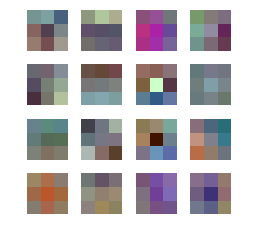

In [6]:
# Obtain the weights from the first convolutional layer
plt.rcParams['figure.figsize'] = (8,4)
filters = net.params['Convolution1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

### Visualise neuron activations given a test set image

In [7]:
net.forward() # Conduct one forward pass through the net

{'Accuracy1': array(0.95, dtype=float32),
 'SoftmaxWithLoss1': array(0.17070231, dtype=float32)}

In [8]:
lab_nm = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # CIFAR label names

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image Label: airplane


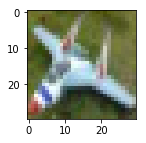

In [9]:
im_mean = np.asarray([122.46,120.04,111.08]) # Mean channel values in RGB format
dat_img = net.blobs['data'].data[67]         # Get the data of a single test image
dat_img = np.transpose(dat_img,(1,2,0))      # Transpose C x H x W Caffe blob tensor to H x W x C image format
dat_img = dat_img[:,:,::-1]                  # Roll axis from BGR to RGB
dat_img = np.round(np.add(dat_img,im_mean),0).astype(int) # Add channel means, round and convert to ints

plt.rcParams['figure.figsize'] = (4,2)       # Resize display
plt.imshow(dat_img)                          # Display image
print("Image Label:",lab_nm[int(net.blobs['label'].data[0])]) # Print image label

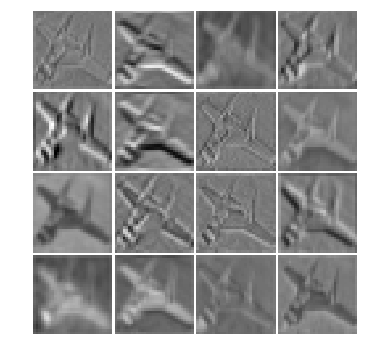

In [10]:
plt.rcParams['figure.figsize'] = (12,6)
vis_square(net.blobs['Convolution1'].data[67])

It can be easily seen that the filters of the first convolutional layer are sensitive to different features of the image. Some are senstive to edges, others lines and textures. The clarity of the visualised filters is consistent with a well trained and regularised neural network.

### Visualise global pooling layer activations using t-SNE

In [11]:
# This nested loop is best executed with Caffe in GPU mode.
# DenseNet-40-12, like most modern Deep Learning Computer Vision models, has no fully connected layers.
# Instead, global average pooling layers are calculated. These contain much fewer weights than FC layers.
iters = 100
acts = []
labs = []
for i in range(iters):
    net.forward()
    for n in range(100):
        act = list(net.blobs['Pooling3'].data[n].flatten())
        lb = net.blobs['label'].data[n]
        labs.append(lb)
        acts.append(act)
activations = np.asarray(acts)

In [12]:
# Training the t-SNE model may take some time
tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=5, learning_rate = 200)
T = tsne.fit_transform(activations)

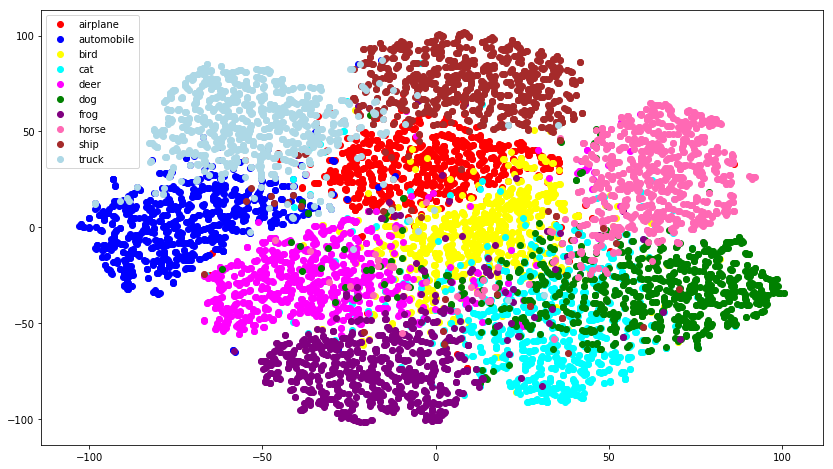

In [13]:
plt.rcParams['figure.figsize'] = (14,8)
lbs = np.asarray(labs)
lab_ids = range(len(lab_nm))
colors = 'red','blue','yellow','cyan','magenta','green','purple','hotpink','brown','lightblue'
for i, c, label in zip(lab_ids, colors, lab_nm):
    plt.scatter(T[lbs == i, 0],T[lbs == i, 1],c=c,label=label)
plt.legend()
plt.show()

In this visualisation, images above zero on the ordinate t-SNE dimension are mostly of machines whilst those below this point tend to be of animals. The DenseNet-40-12 model clusters frogs, horses, cars, ships and trucks quite ably; however, it does not appear to discriminate well between cats and dogs.